In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#Loading dataset
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

# Changing job_posted_date to date time format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\jakey\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns


In [3]:
df_Da_Us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_Da_Us = df_Da_Us.dropna(subset=['salary_year_avg'])

In [4]:
df_Da_Us = df_Da_Us.explode(['job_skills'])
df_Da_Us_grouped = df_Da_Us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_Da_top_pay = df_Da_Us_grouped.sort_values(by = 'median', ascending= False).head(10)

df_Da_skill = df_Da_Us_grouped.sort_values(by = 'count', ascending= False).head(10).sort_values(by = 'median', ascending= False)

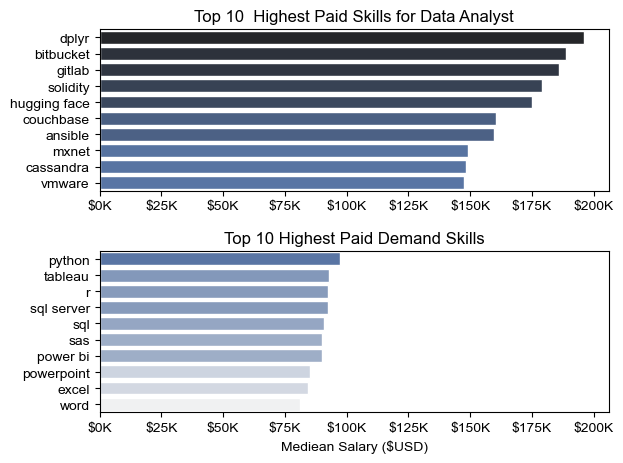

In [5]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')


sns.barplot(data= df_Da_top_pay, x='median', y = df_Da_top_pay.index, ax = ax[0], hue = 'median', palette= 'dark:b_r', legend= False)
# df_Da_top_pay.plot(kind = 'barh', y = 'median', ax = ax[0], legend= False)
# ax[0].invert_yaxis()
ax[0].set_title('Top 10  Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos: f'${int(x/1000)}K'))

sns.barplot(data= df_Da_skill, x='median', y = df_Da_skill.index, ax = ax[1], hue= 'median', palette= 'light:b', legend= False)
# ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Highest Paid Demand Skills')
ax[1].set_xlabel('Mediean Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos: f'${int(x/1000)}K'))


fig.tight_layout()
plt.show()


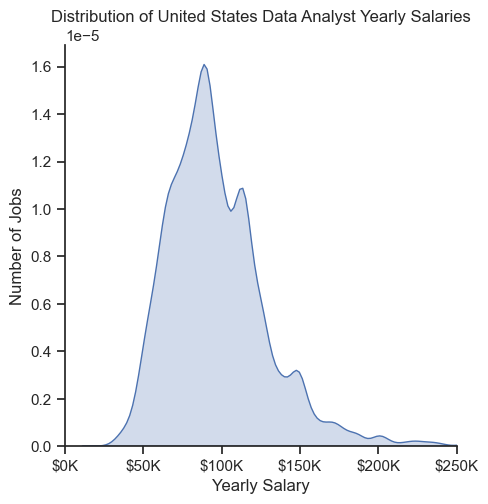

In [6]:

sns.displot(df_Da_Us['salary_year_avg'], kind='kde', fill = True)
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

C:\Users\jakey\AppData\Local\Temp\ipykernel_30452\1592338886.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels= job_titles, vert= False)


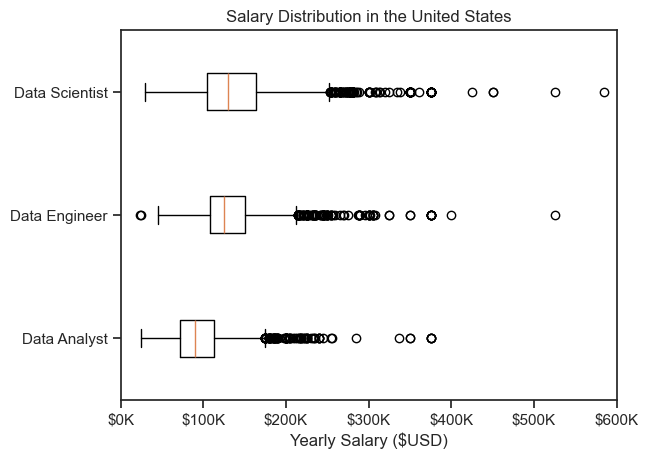

In [7]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']


df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]



plt.boxplot(job_list, labels= job_titles, vert= False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()

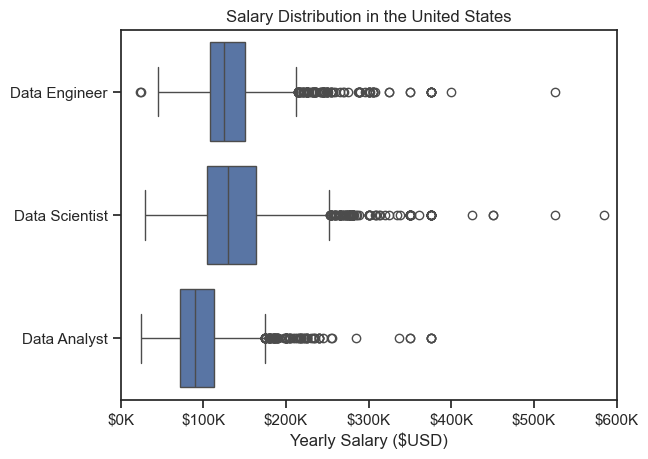

In [8]:
sns.boxplot(data = df_US, x = 'salary_year_avg', y = 'job_title_short')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.show()